In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer

from scipy import stats
import numpy as np
from scipy.stats import boxcox

In [2]:
datas = pd.read_csv("AmesHousing_features.csv")
datas.head(20)

,Lot Frontage,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Central Air,Gr Liv Area,Full Bath,Half Bath,Kitchen Qual,Fireplaces,Garage Finish,Garage Cars,Paved Drive,Wood Deck SF,Open Porch SF,SalePrice,SalePriceLog
0,141.0,6,1960,1960,112.0,639.0,1080.0,Y,1656,1,0,TA,2,Fin,2.0,P,210,62,215000,12.278398
1,80.0,5,1961,1961,0.0,468.0,882.0,Y,896,1,0,TA,0,Unf,1.0,Y,140,0,105000,11.561725
2,81.0,6,1958,1958,108.0,923.0,1329.0,Y,1329,1,1,Gd,0,Unf,1.0,Y,393,36,172000,12.055256
3,93.0,7,1968,1968,0.0,1065.0,2110.0,Y,2110,2,1,Ex,2,Fin,2.0,Y,0,0,244000,12.404928
4,74.0,5,1997,1998,0.0,791.0,928.0,Y,1629,2,1,TA,1,Fin,2.0,Y,212,34,189900,12.154258
5,78.0,6,1998,1998,20.0,602.0,926.0,Y,1604,2,1,Gd,1,Fin,2.0,Y,360,36,195500,12.183321
6,41.0,8,2001,2001,0.0,616.0,1338.0,Y,1338,2,0,Gd,0,Fin,2.0,Y,0,0,213500,12.271397
7,43.0,8,1992,1992,0.0,263.0,1280.0,Y,1280,2,0,Gd,0,RFn,2.0,Y,0,82,191500,12.162648
8,39.0,8,1995,1996,0.0,1180.0,1595.0,Y,1616,2,0,Gd,1,RFn,2.0,Y,237,152,236500,12.373708
9,60.0,7,1999,1999,0.0,0.0,994.0,Y,1804,2,1,Gd,1,Fin,2.0,Y,140,60,189000,12.149508


In [3]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2440 non-null   float64
 1   Overall Qual    2930 non-null   int64  
 2   Year Built      2930 non-null   int64  
 3   Year Remod/Add  2930 non-null   int64  
 4   Mas Vnr Area    2907 non-null   float64
 5   BsmtFin SF 1    2929 non-null   float64
 6   Total Bsmt SF   2929 non-null   float64
 7   Central Air     2930 non-null   object 
 8   Gr Liv Area     2930 non-null   int64  
 9   Full Bath       2930 non-null   int64  
 10  Half Bath       2930 non-null   int64  
 11  Kitchen Qual    2930 non-null   object 
 12  Fireplaces      2930 non-null   int64  
 13  Garage Finish   2771 non-null   object 
 14  Garage Cars     2929 non-null   float64
 15  Paved Drive     2930 non-null   object 
 16  Wood Deck SF    2930 non-null   int64  
 17  Open Porch SF   2930 non-null   i

<Axes: >

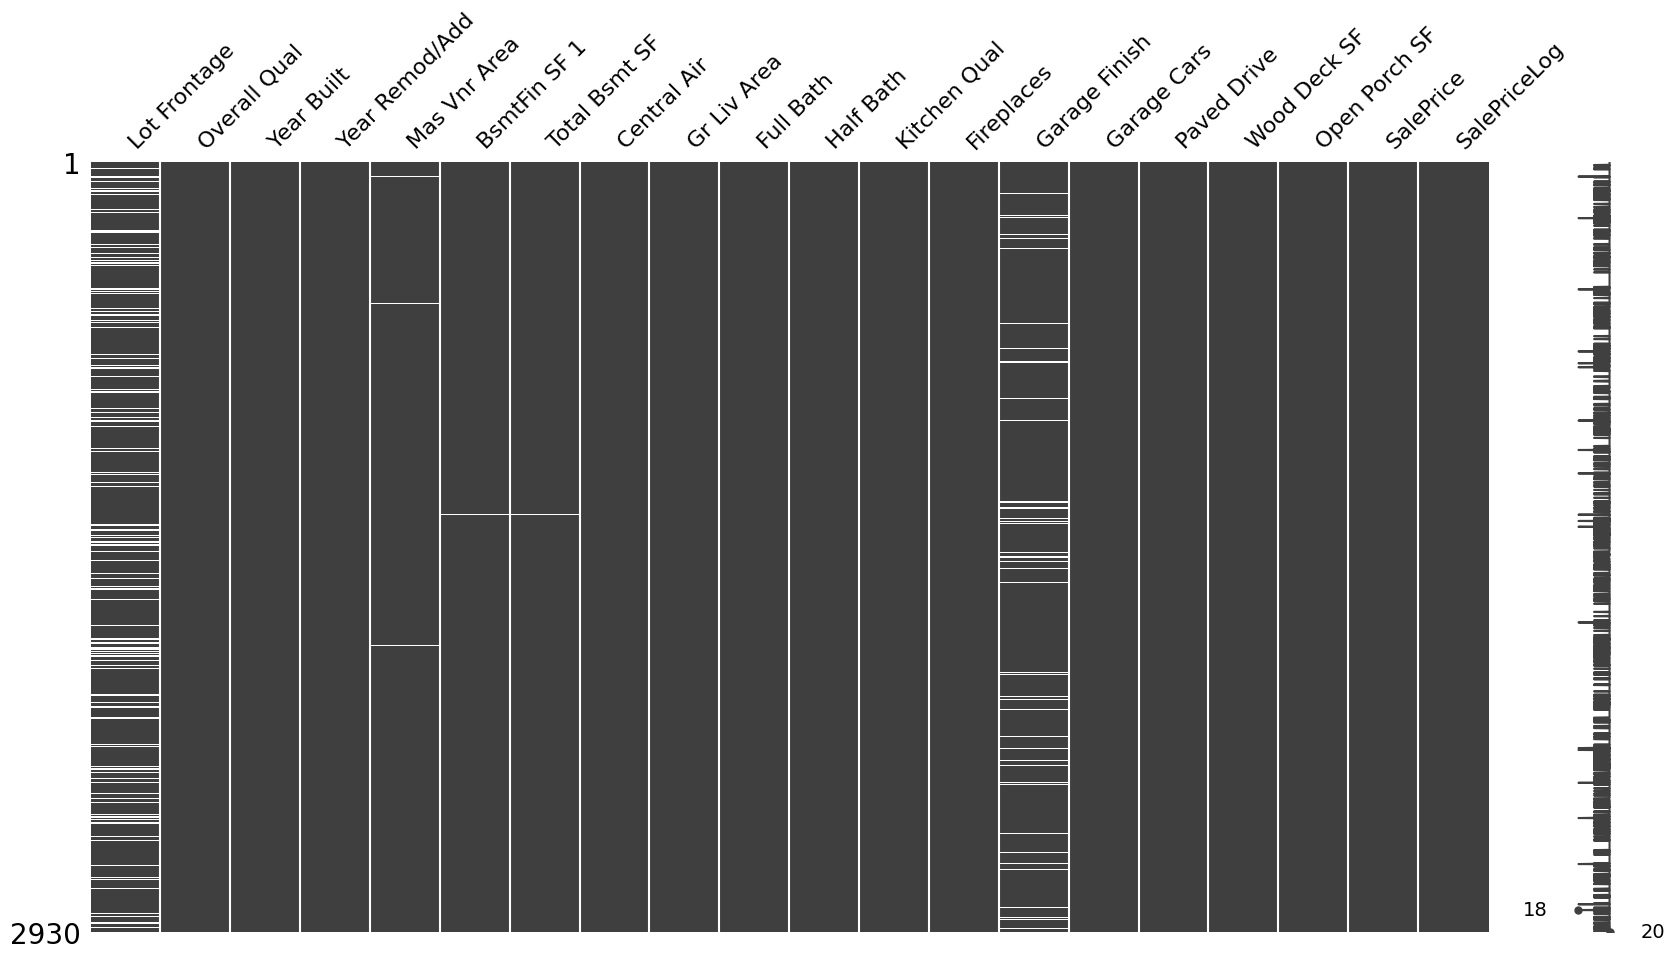

In [4]:
msno.matrix(datas, figsize=(20, 10))

In [5]:
target = datas[['SalePrice', 'SalePriceLog']]
numeric_features = datas.select_dtypes(include=[np.number])
numeric_features = numeric_features.drop(columns=['SalePrice', 'SalePriceLog'])
numeric_features.head(5)

,Lot Frontage,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Full Bath,Half Bath,Fireplaces,Garage Cars,Wood Deck SF,Open Porch SF
0,141.0,6,1960,1960,112.0,639.0,1080.0,1656,1,0,2,2.0,210,62
1,80.0,5,1961,1961,0.0,468.0,882.0,896,1,0,0,1.0,140,0
2,81.0,6,1958,1958,108.0,923.0,1329.0,1329,1,1,0,1.0,393,36
3,93.0,7,1968,1968,0.0,1065.0,2110.0,2110,2,1,2,2.0,0,0
4,74.0,5,1997,1998,0.0,791.0,928.0,1629,2,1,1,2.0,212,34


In [6]:
categical_features = datas.select_dtypes(exclude=[np.number])
categical_features.head(5)

,Central Air,Kitchen Qual,Garage Finish,Paved Drive
0,Y,TA,Fin,P
1,Y,TA,Unf,Y
2,Y,Gd,Unf,Y
3,Y,Ex,Fin,Y
4,Y,TA,Fin,Y


In [7]:
categical_features.nunique()

Central Air      2
Kitchen Qual     5
Garage Finish    3
Paved Drive      3
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value='Missing')
categical_features[list(categical_features.columns)] = imputer.fit_transform(categical_features)

In [ ]:
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
df_imputed = imputer.fit_transform(numeric_features)
df_imputed = pd.DataFrame(df_imputed, columns=numeric_features.columns)
df_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2930 non-null   float64
 1   Overall Qual    2930 non-null   float64
 2   Year Built      2930 non-null   float64
 3   Year Remod/Add  2930 non-null   float64
 4   Mas Vnr Area    2930 non-null   float64
 5   BsmtFin SF 1    2930 non-null   float64
 6   Total Bsmt SF   2930 non-null   float64
 7   Gr Liv Area     2930 non-null   float64
 8   Full Bath       2930 non-null   float64
 9   Half Bath       2930 non-null   float64
 10  Fireplaces      2930 non-null   float64
 11  Garage Cars     2930 non-null   float64
 12  Wood Deck SF    2930 non-null   float64
 13  Open Porch SF   2930 non-null   float64
dtypes: float64(14)
memory usage: 320.6 KB


In [10]:
type(categical_features)

pandas.core.frame.DataFrame

In [11]:
data_5 = df_imputed.merge(categical_features, left_index=True, right_index=True)
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2930 non-null   float64
 1   Overall Qual    2930 non-null   float64
 2   Year Built      2930 non-null   float64
 3   Year Remod/Add  2930 non-null   float64
 4   Mas Vnr Area    2930 non-null   float64
 5   BsmtFin SF 1    2930 non-null   float64
 6   Total Bsmt SF   2930 non-null   float64
 7   Gr Liv Area     2930 non-null   float64
 8   Full Bath       2930 non-null   float64
 9   Half Bath       2930 non-null   float64
 10  Fireplaces      2930 non-null   float64
 11  Garage Cars     2930 non-null   float64
 12  Wood Deck SF    2930 non-null   float64
 13  Open Porch SF   2930 non-null   float64
 14  Central Air     2930 non-null   object 
 15  Kitchen Qual    2930 non-null   object 
 16  Garage Finish   2930 non-null   object 
 17  Paved Drive     2930 non-null   o

In [12]:
data_5.describe()

,Lot Frontage,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Full Bath,Half Bath,Fireplaces,Garage Cars,Wood Deck SF,Open Porch SF
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,69.363595,6.094881,1971.356314,1984.266553,102.387600,442.538794,1051.435040,1499.690444,1.566553,0.379522,0.599317,1.766894,93.751877,47.533447
std,22.240685,1.411026,30.245361,20.860286,179.087919,455.539559,440.646984,505.508887,0.552941,0.502629,0.647921,0.760449,126.361562,67.483400
min,21.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.666667,5.000000,1954.000000,1965.000000,0.000000,0.000000,793.000000,1126.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,68.333333,6.000000,1973.000000,1993.000000,0.000000,370.000000,990.000000,1442.000000,2.000000,0.000000,1.000000,2.000000,0.000000,27.000000
75%,80.000000,7.000000,2001.000000,2004.000000,164.750000,734.000000,1301.500000,1742.750000,2.000000,1.000000,1.000000,2.000000,168.000000,70.000000
max,313.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,5642.000000,4.000000,2.000000,4.000000,5.000000,1424.000000,742.000000


In [13]:
data_5.describe(include="object")

,Central Air,Kitchen Qual,Garage Finish,Paved Drive
count,2930,2930,2930,2930
unique,2,5,4,3
top,Y,TA,Unf,Y
freq,2734,1494,1231,2652


In [14]:
n_cols = 5  
n_features = len(numeric_features.columns)
n_rows = (n_features + n_cols - 1) // n_cols
print(n_cols, n_rows)

5 3


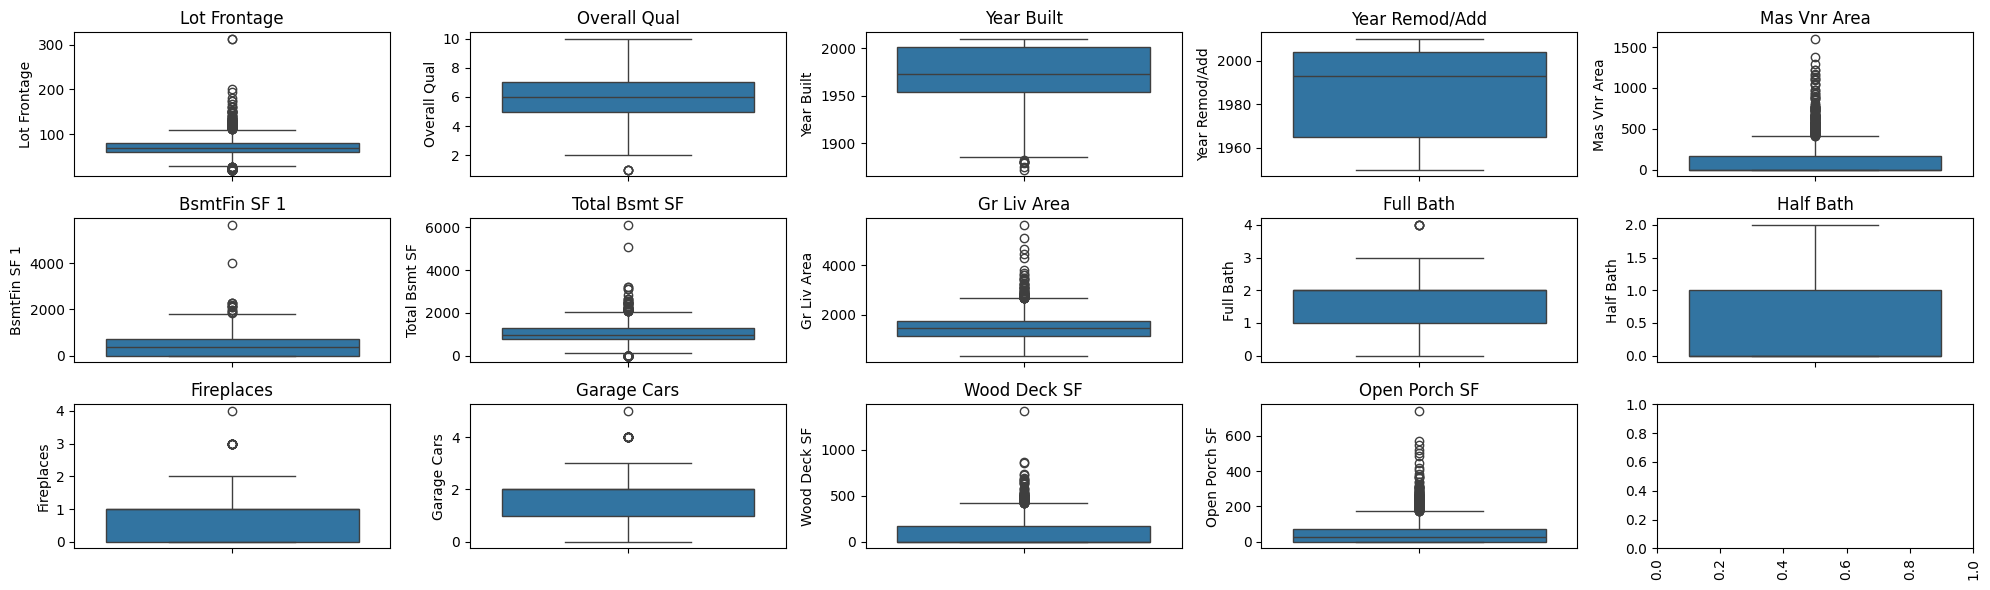

In [15]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 2 * n_rows))
for i, col in enumerate(numeric_features.columns):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(data_5[col], ax=ax)
    ax.set_title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

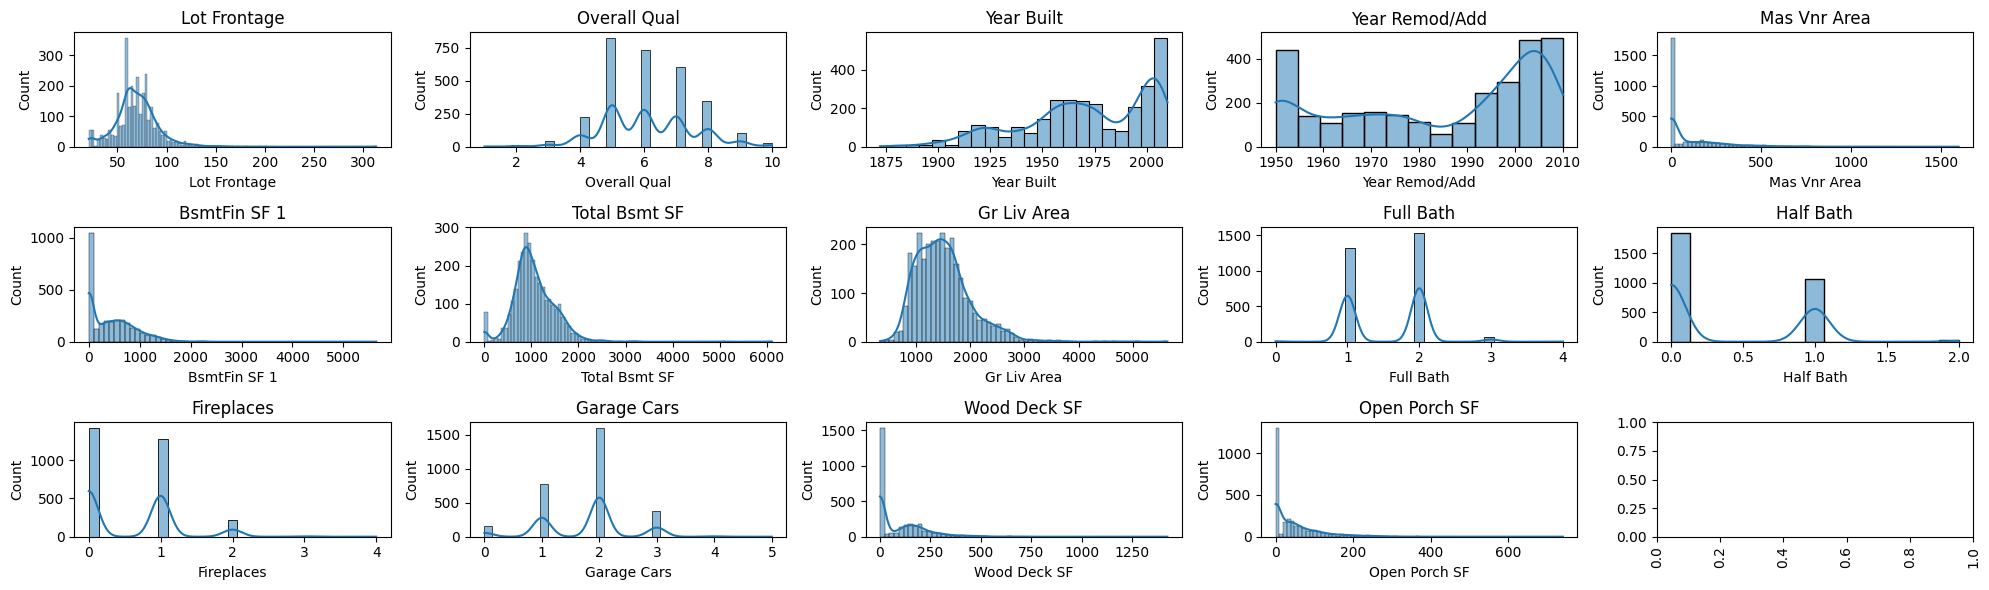

In [16]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 2 * n_rows))
for i, col in enumerate(numeric_features.columns):
    ax = axes[i // n_cols, i % n_cols]
    sns.histplot(data_5[col], kde=True, ax=ax)
    ax.set_title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
mask = numeric_features.nunique() > 10
numeric_features_without_cat = numeric_features.loc[:, mask]
numeric_features_without_cat.nunique()

Lot Frontage       128
Year Built         118
Year Remod/Add      61
Mas Vnr Area       445
BsmtFin SF 1       995
Total Bsmt SF     1058
Gr Liv Area       1292
Wood Deck SF       380
Open Porch SF      252
dtype: int64

In [18]:
mask = numeric_features.nunique() <= 10
numeric_features_with_cat = numeric_features.loc[:, mask]
numeric_features_with_cat.nunique()

Overall Qual    10
Full Bath        5
Half Bath        3
Fireplaces       5
Garage Cars      6
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='most_frequent', fill_value='Missing')
numeric_features_with_cat[list(numeric_features_with_cat.columns)] = imputer.fit_transform(numeric_features_with_cat)

/tmp/ipykernel_19579/865100541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features_with_cat[list(numeric_features_with_cat.columns)] = imputer.fit_transform(numeric_features_with_cat)


In [20]:
categical_features_new = categical_features.copy()
categical_features_new[list(numeric_features_with_cat.columns)] = numeric_features_with_cat
categical_features_new.columns

Index(['Central Air', 'Kitchen Qual', 'Garage Finish', 'Paved Drive',
       'Overall Qual', 'Full Bath', 'Half Bath', 'Fireplaces', 'Garage Cars'],
      dtype='object')

In [21]:
n_cols = 5  
n_features = len(numeric_features_without_cat.columns)
n_rows = (n_features + n_cols - 1) // n_cols
print(n_cols, n_rows)

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 2 * n_rows))
# for i, col in enumerate(numeric_features_without_cat.columns):
#     ax = axes[i // n_cols, i % n_cols]
#     sns.histplot(data_5[col], kde=True, ax=ax)
#     ax.set_title(col)
#     plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

5 2


In [22]:
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 2 * n_rows))
# for i, col in enumerate(numeric_features_without_cat.columns):
#     ax = axes[i // n_cols, i % n_cols]
#     sns.boxplot(numeric_features_without_cat[col], ax=ax)
#     ax.set_title(col)
#     plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

In [ ]:
for i, col in enumerate(numeric_features_without_cat.columns):
    # Test de normalité (Shapiro-Wilk)
    stat, p = stats.shapiro(numeric_features_without_cat[col].dropna())
    print(f'{col}: p-value={p:.9f}')
print('normal si p-value > 0.05')

Lot Frontage: p-value=0.000000000
Year Built: p-value=0.000000000
Year Remod/Add: p-value=0.000000000
Mas Vnr Area: p-value=0.000000000
BsmtFin SF 1: p-value=0.000000000
Total Bsmt SF: p-value=0.000000000
Gr Liv Area: p-value=0.000000000
Wood Deck SF: p-value=0.000000000
Open Porch SF: p-value=0.000000000
normal si p-value > 0.05


In [27]:
# for i, col in enumerate(numeric_features_without_cat.columns):
#     numeric_features_without_cat[col] = winsorize(numeric_features_without_cat[col], limits=[0.05, 0.05])
#     stat, p = stats.shapiro(numeric_features_without_cat[col].dropna())
#     print(f'{col}: p-value={p:.4f}')

5 2


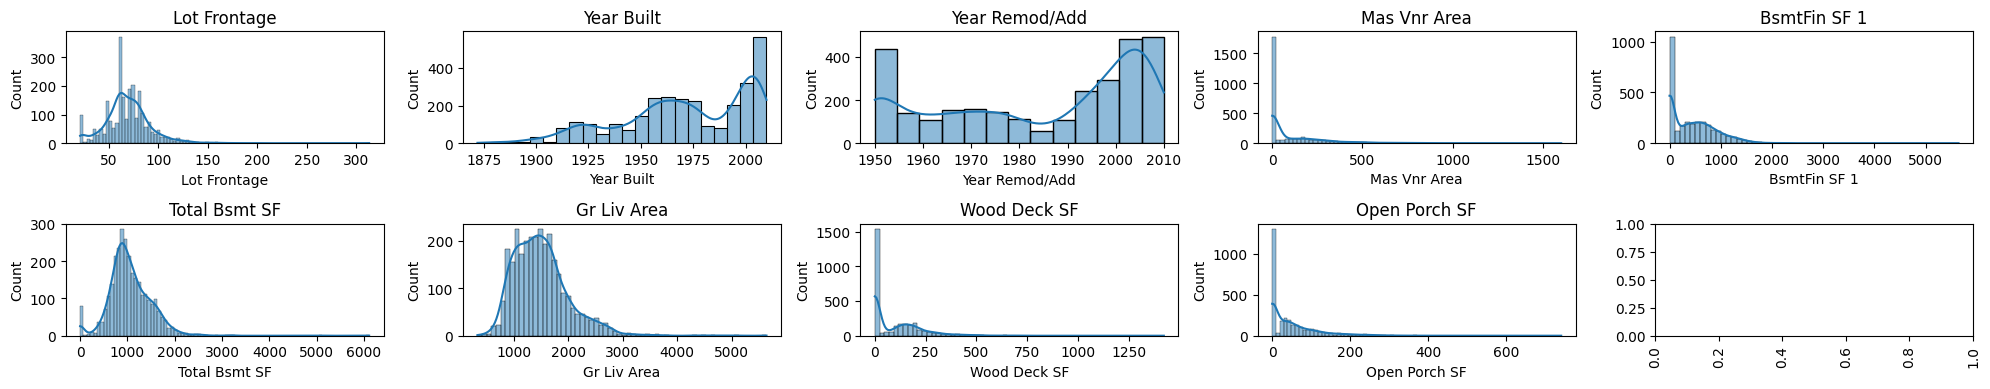

In [28]:
n_cols = 5
n_features = len(numeric_features_without_cat.columns)
n_rows = (n_features + n_cols - 1) // n_cols
print(n_cols, n_rows)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 2 * n_rows))
for i, col in enumerate(numeric_features_without_cat.columns):
    ax = axes[i // n_cols, i % n_cols]
    sns.histplot(numeric_features_without_cat[col], kde=True, ax=ax)
    ax.set_title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
X = numeric_features_without_cat
X[list(categical_features_new.columns)] = categical_features_new
X.head()

/tmp/ipykernel_19579/1268315895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[list(categical_features_new.columns)] = categical_features_new
/tmp/ipykernel_19579/1268315895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[list(categical_features_new.columns)] = categical_features_new
/tmp/ipykernel_19579/1268315895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,Lot Frontage,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Wood Deck SF,Open Porch SF,Central Air,Kitchen Qual,Garage Finish,Paved Drive,Overall Qual,Full Bath,Half Bath,Fireplaces,Garage Cars
0,141.0,1960,1960,112.0,639.0,1080.0,1656,210,62,Y,TA,Fin,P,6.0,1.0,0.0,2.0,2.0
1,80.0,1961,1961,0.0,468.0,882.0,896,140,0,Y,TA,Unf,Y,5.0,1.0,0.0,0.0,1.0
2,81.0,1958,1958,108.0,923.0,1329.0,1329,393,36,Y,Gd,Unf,Y,6.0,1.0,1.0,0.0,1.0
3,93.0,1968,1968,0.0,1065.0,2110.0,2110,0,0,Y,Ex,Fin,Y,7.0,2.0,1.0,2.0,2.0
4,74.0,1997,1998,0.0,791.0,928.0,1629,212,34,Y,TA,Fin,Y,5.0,2.0,1.0,1.0,2.0


# data preprocessing

In [31]:
y = target[["SalePrice"]]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cat_cols = list(categical_features_new.columns)
num_cols = list(numeric_features_without_cat.columns)

for col in cat_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cat_cols])
X_test_encoded = encoder.transform(X_test[cat_cols])

encoded_col_names = encoder.get_feature_names_out(cat_cols)

X_train[encoded_col_names] = X_train_encoded
X_test[encoded_col_names] = X_test_encoded

X_train_ = X_train.drop(columns=cat_cols)
X_test_ = X_test.drop(columns=cat_cols)

In [40]:
imputer = KNNImputer(
    n_neighbors=3,
    weights='uniform',
    metric='nan_euclidean'
)

X_train_imp = imputer.fit_transform(X_train_)
X_train_imp = pd.DataFrame(X_train_imp, columns=X_train_.columns)
X_test_imp = imputer.fit_transform(X_test_)
X_test_imp = pd.DataFrame(X_test_imp, columns=X_test_.columns)

In [ ]:
selector = SelectKBest(score_func=f_regression, k=15)
X_train_selected = selector.fit_transform(X_train_imp, y_train)
X_test_selected = selector.transform(X_test_imp)

/home/hermann/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    score = model.score(X_test_selected, y_test)
    print(f"{name}: {score:.3f}")

Linear Regression: 0.832


/home/hermann/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest: 0.872
XGBoost: 0.819


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train_imp, y_train)
    score = model.score(X_test_imp, y_test)
    print(f"{name}: {score:.3f}")

Linear Regression: 0.869


/home/hermann/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest: 0.893
XGBoost: 0.875


In [48]:
train_score = model.score(X_train_imp, y_train)
test_score = model.score(X_test_imp, y_test)
print(f"{name} - Train: {train_score:.3f}, Test: {test_score:.3f}")

XGBoost - Train: 0.997, Test: 0.875


In [ ]:
# Pour XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_imp, y_train)

best_model = grid_search.best_estimator_
print(f"Meilleurs paramètres: {grid_search.best_params_}")

Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [51]:
model = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=200)

In [52]:
model.fit(X_train_imp, y_train)
score = model.score(X_test_imp, y_test)
print(f"{score:.3f}")

0.920


In [53]:
train_score = model.score(X_train_imp, y_train)
test_score = model.score(X_test_imp, y_test)
print(f"{name} - Train: {train_score:.3f}, Test: {test_score:.3f}")

XGBoost - Train: 0.953, Test: 0.920


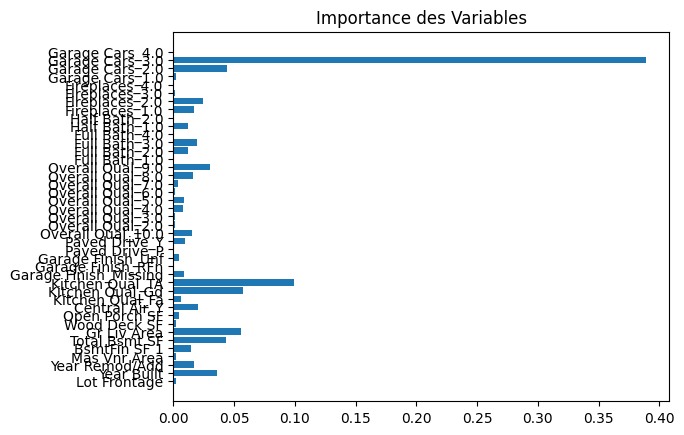

In [ ]:
feature_importances = best_model.feature_importances_
features = X_train_imp.columns
plt.barh(features, feature_importances)
plt.title("Importance des Variables")
plt.show()

In [ ]:
X = X_train_imp.concat()

In [ ]:
scores = cross_val_score(best_model, X_train_imp, y_train, cv=10, scoring='r2')
print(f"R² moyen: {scores.mean():.3f} (±{scores.std():.3f})")

R² moyen: 0.864 (±0.026)


In [ ]:
y_pred = best_model.predict(X_test_imp)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

RMSE: 0.13
MAE: 0.09
